# **Stock Price Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import nltk as nltk

In [2]:
import sys
sys.path.append('../')
news = pd.read_csv('../docs/raw_analyst_ratings.csv')

In [3]:
news.head(30)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


## **Historical Data**

>> ### AAPL Historical Data

In [4]:
stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
stock_data = {}
for stock in stocks:
    file_name = f'../docs/yfinance_data/{stock}_historical_data.csv'
    stock_data[stock] = pd.read_csv(file_name)
print(stock_data['AAPL'].head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [5]:
#print(news[news['date'].isna()])
error_count= news['date'].isna().sum()
print(f"Number of missing dates: {error_count}")

Number of missing dates: 0


In [6]:
print(stock_data['AAPL'].head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [7]:
from scripts.dateFormat import formatDate
news['date']=formatDate(news)
for stock in stocks:
    stock_data[stock]['Date'] = formatDate(stock_data[stock],True)

>> ### Exploratory Data Analysis

In [8]:
print(news['publisher'].value_counts())
print(news['date'].describe())

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64
count                                1407328
mean     2015-08-22 01:44:39.007627520-04:00
min                2009-02-14 00:00:00-04:00
25%                2013-01-16 00:00:00-04:00
50%                2015-09-23 00:00:00-04:00
75%                2018-05-21 00:00:00-04:00
max                2020-06-11 17:12:35-04:00
Name: date, dtype: object


#### Number of articles over time

/tmp/ipykernel_240497/1065635069.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = news['date'].dt.to_period('Y').value_counts().sort_index()


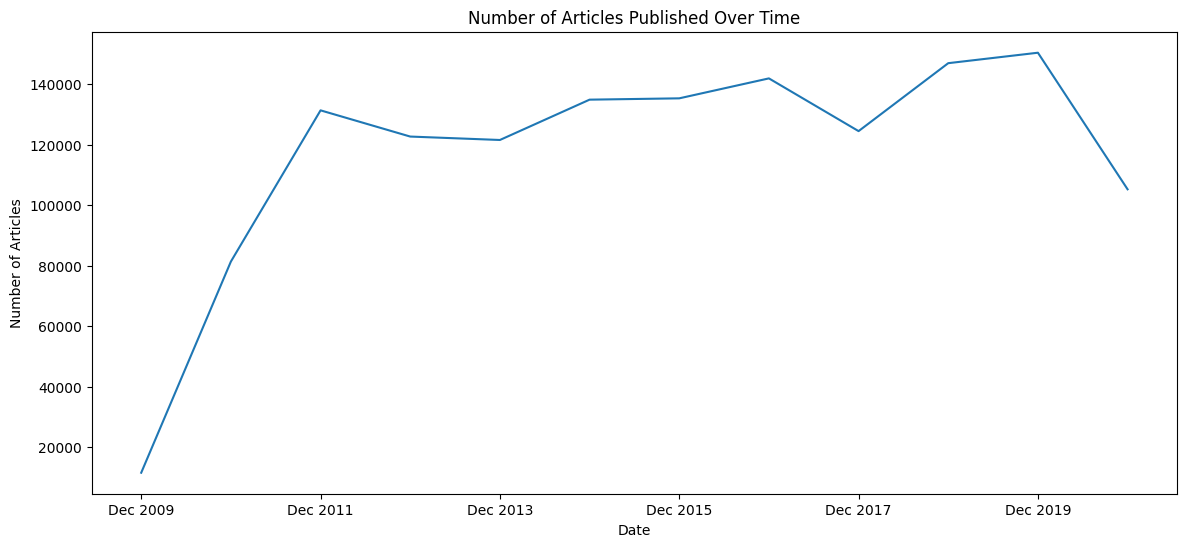

In [10]:
#news['date'].dt.to_period('M').value_counts().sort_index().plot(kind='bar', figsize=(14, 6))
monthly_counts = news['date'].dt.to_period('Y').value_counts().sort_index()
monthly_counts.index = monthly_counts.index.strftime('%b %Y')
monthly_counts.plot(kind='line', figsize=(14, 6))
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

## Sentiment Analysis

In [11]:
from scripts.getSentiment import get_sentiment
news['sentiment_score'] = news['headline'].apply(get_sentiment)

In [12]:
print(news[['headline', 'sentiment_score']].head(40))

                                             headline  sentiment_score
0             Stocks That Hit 52-Week Highs On Friday         0.000000
1          Stocks That Hit 52-Week Highs On Wednesday         0.000000
2                       71 Biggest Movers From Friday         0.000000
3        46 Stocks Moving In Friday's Mid-Day Session         0.000000
4   B of A Securities Maintains Neutral on Agilent...         0.000000
5   CFRA Maintains Hold on Agilent Technologies, L...         0.000000
6   UBS Maintains Neutral on Agilent Technologies,...         0.000000
7   Agilent Technologies shares are trading higher...         0.250000
8   Wells Fargo Maintains Overweight on Agilent Te...         0.000000
9          10 Biggest Price Target Changes For Friday         0.000000
10    30 Stocks Moving in Friday's Pre-Market Session         0.000000
11  SVB Leerink Maintains Outperform on Agilent Te...         0.000000
12  8 Stocks Moving In Thursday's After-Hours Session         0.000000
13  Ag

In [13]:
from scripts.getSentiment import classify_sentiment_score
news['sentiment_score'] = news['sentiment_score'].apply(classify_sentiment_score)

In [14]:
news.head(40)

,Unnamed: 0,headline,url,publisher,date,stock,sentiment_score
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,Neutral
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A,Neutral
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A,Neutral
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A,Positive
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A,Neutral
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A,Neutral


### Data Integration

In [15]:
news_data_aapl = news[news['stock'] == 'AAPL']
news_data_aapl = news_data_aapl[['date', 'sentiment_score']]

In [18]:
# Convert both columns to UTC timezone (assuming they are already in UTC)
stock_data['AAPL']['Date'] = stock_data['AAPL']['Date'].dt.tz_convert('UTC')
news_data_aapl['date'] = news_data_aapl['date'].dt.tz_convert('UTC')

# Merge the dataframes
merged_data_aapl = pd.merge(stock_data['AAPL'], news_data_aapl, left_on='Date', right_on='date', how='left')

# Identify and drop unnecessary cols
merged_data_aapl = merged_data_aapl.drop(['date'], axis=1)

print(merged_data_aapl.head())


                       Date      Open      High       Low     Close  \
0 1980-12-12 00:00:00+00:00  0.128348  0.128906  0.128348  0.128348   
1 1980-12-15 00:00:00+00:00  0.122210  0.122210  0.121652  0.121652   
2 1980-12-16 00:00:00+00:00  0.113281  0.113281  0.112723  0.112723   
3 1980-12-17 00:00:00+00:00  0.115513  0.116071  0.115513  0.115513   
4 1980-12-18 00:00:00+00:00  0.118862  0.119420  0.118862  0.118862   

   Adj Close     Volume  Dividends  Stock Splits sentiment_score  
0   0.098943  469033600        0.0           0.0             NaN  
1   0.093781  175884800        0.0           0.0             NaN  
2   0.086898  105728000        0.0           0.0             NaN  
3   0.089049   86441600        0.0           0.0             NaN  
4   0.091630   73449600        0.0           0.0             NaN  


### Daily Stock Returns

In [19]:
merged_data_aapl['Daily Return'] = merged_data_aapl['Close'].pct_change()

# Fill NaN values that may result from pct_change
merged_data_aapl['Daily Return'].fillna(0, inplace=True)
print(merged_data_aapl.head())

                       Date      Open      High       Low     Close  \
0 1980-12-12 00:00:00+00:00  0.128348  0.128906  0.128348  0.128348   
1 1980-12-15 00:00:00+00:00  0.122210  0.122210  0.121652  0.121652   
2 1980-12-16 00:00:00+00:00  0.113281  0.113281  0.112723  0.112723   
3 1980-12-17 00:00:00+00:00  0.115513  0.116071  0.115513  0.115513   
4 1980-12-18 00:00:00+00:00  0.118862  0.119420  0.118862  0.118862   

   Adj Close     Volume  Dividends  Stock Splits sentiment_score  Daily Return  
0   0.098943  469033600        0.0           0.0             NaN      0.000000  
1   0.093781  175884800        0.0           0.0             NaN     -0.052171  
2   0.086898  105728000        0.0           0.0             NaN     -0.073398  
3   0.089049   86441600        0.0           0.0             NaN      0.024751  
4   0.091630   73449600        0.0           0.0             NaN      0.028992  


/tmp/ipykernel_240497/1841543699.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data_aapl['Daily Return'].fillna(0, inplace=True)


### Correlation Analysis

In [ ]:
# Calculate the Pearson correlation between sentiment scores and daily returns
correlation = merged_data_aapl['sentiment_score'].corr(merged_data_aapl['Daily Return'])
print(f'Correlation between sentiment and daily returns for AAPL: {correlation:.2f}')

## AAPL Stock

In [8]:
AAPLstock = pd.read_csv('../docs/yfinance_data/AAPL_historical_data.csv')
AAPLstock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
